1
Iteration:  0  Error:  72.22017714670116
2
Iteration:  0  Error:  20.35132250159242
3
Iteration:  0  Error:  20.26740718474747
4
Iteration:  0  Error:  20.2217429113875
5
Iteration:  0  Error:  20.188591503531338
6
Iteration:  0  Error:  20.160735457471606
7
Iteration:  0  Error:  20.135369551605628
8
Iteration:  0  Error:  20.111283214350472
9
Iteration:  0  Error:  20.08791171815587
10
Iteration:  0  Error:  20.064992592629853
11
Iteration:  0  Error:  20.042423230689238
12
Iteration:  0  Error:  20.020190153508313
13
Iteration:  0  Error:  19.998327954444953
14
Iteration:  0  Error:  19.97689356531925
15
Iteration:  0  Error:  19.95595007062692
16
Iteration:  0  Error:  19.935557006759275
17
Iteration:  0  Error:  19.915765094231958
18
Iteration:  0  Error:  19.896613904712105
19
Iteration:  0  Error:  19.87813137968041
20
Iteration:  0  Error:  19.860334449978254
21
Iteration:  0  Error:  19.843230258716886
22
Iteration:  0  Error:  19.826817669760146
23
Iteration:  0  Error:  19

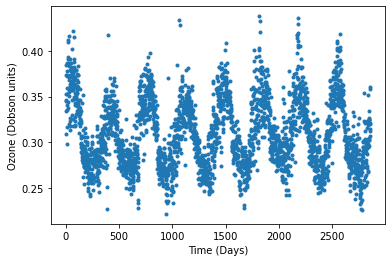

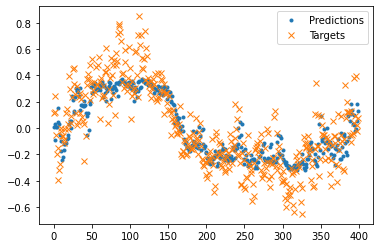

In [3]:

import pylab as pl
import numpy as np

PNoz = np.loadtxt('PNOz.dat')
pl.ion()
pl.plot(np.arange(np.shape(PNoz)[0]),PNoz[:,2],'.')
pl.xlabel('Time (Days)')
pl.ylabel('Ozone (Dobson units)')

# Normalise data
PNoz[:,2] = PNoz[:,2]-PNoz[:,2].mean()
PNoz[:,2] = PNoz[:,2]/PNoz[:,2].max()

# Assemble input vectors
t = 2
k = 3

lastPoint = np.shape(PNoz)[0]-t*(k+1)
inputs = np.zeros((lastPoint,k))
targets = np.zeros((lastPoint,1))
for i in range(lastPoint):
    inputs[i,:] = PNoz[i:i+t*k:t,2]
    targets[i] = PNoz[i+t*(k+1),2]
    
test = inputs[-400:,:]
testtargets = targets[-400:]
train = inputs[:-400:2,:]
traintargets = targets[:-400:2]
valid = inputs[1:-400:2,:]
validtargets = targets[1:-400:2]

# Randomly order the data
change = np.arange(np.shape(inputs)[0])
np.random.shuffle(change)
inputs = inputs[change,:]
targets = targets[change,:]

# Train the network
import MLP as mlp
net = mlp.mlp(train,traintargets,3,outtype='linear')
net.earlystopping(train,traintargets,valid,validtargets,0.25)

test = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)
testout = net.mlpfwd(test)

pl.figure()
pl.plot(np.arange(np.shape(test)[0]),testout,'.')
pl.plot(np.arange(np.shape(test)[0]),testtargets,'x')
pl.legend(('Predictions','Targets'))
print (0.5*np.sum((testtargets-testout)**2))
pl.show()